In [41]:
import xgboost
import shap
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
dataset = california_housing.frame
X = dataset.copy().drop(['MedHouseVal'], axis=1)
y = dataset['MedHouseVal']
# cal_features = X.columns
cal_features = california_housing.feature_names
cal_features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
model = xgboost.XGBRegressor(objective='reg:squarederror',
                             n_estimators=500)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [63]:
shap_values_sum = shap_values.sum(axis=0).values
for i in shap_values_sum.argsort()[::-1]:
    print(f'{cal_features[i]}: \t'
          f'{shap_values_sum[i]:.3f} +/- {shap_values.mean(axis=0).data[i]:.3f}')

Longitude: 	72.948 +/- -119.519
AveBedrms: 	35.592 +/- 1.097
HouseAge: 	18.079 +/- 28.764
Population: 	-7.692 +/- 1421.572
MedInc: 	-14.386 +/- 3.830
Latitude: 	-16.123 +/- 35.587
AveOccup: 	-33.797 +/- 2.965
AveRooms: 	-109.411 +/- 5.404


In [69]:
first_row_shap = shap_values[0]
shapley_values = first_row_shap.values

print(f'Predicted Value: {first_row_shap.base_values+sum(shapley_values)}\n')
print(f'Baseline: {first_row_shap.base_values}\n')

print('Shapley values for features:')
for i, shapley_value in enumerate(shapley_values):
    print(f'{shap_values.feature_names[i]}: {shapley_value}')

print('\nMost to least influential features:')
most_influential_ordering = np.argsort(-np.abs(shapley_values))
for i in range(len(shapley_values)):
    print(f'{shap_values.feature_names[most_influential_ordering[i]]}: {shapley_values[most_influential_ordering[i]]}')

Predicted Value: 0.45514845848083496

Baseline: 2.0719456672668457

Shapley values for features:
MedInc: -0.3912273049354553
HouseAge: 0.006093669682741165
AveRooms: -0.1752156764268875
AveBedrms: 0.0005621189484372735
Population: -0.04658883810043335
AveOccup: -0.23624873161315918
Latitude: -0.3718551695346832
Longitude: -0.4023173451423645

Most to least influential features:
Longitude: -0.4023173451423645
MedInc: -0.3912273049354553
Latitude: -0.3718551695346832
AveOccup: -0.23624873161315918
AveRooms: -0.1752156764268875
Population: -0.04658883810043335
HouseAge: 0.006093669682741165
AveBedrms: 0.0005621189484372735


In [53]:
shap_values.sum(axis=0).values.argsort()[::-1]

array([7, 3, 1, 4, 0, 6, 5, 2])

In [64]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [61]:
shap_values

.values =
array([[-0.3912273 ,  0.00609367, -0.17521568, ..., -0.23624873,
        -0.37185517, -0.40231735],
       [-0.44069517,  0.03426162, -0.1306791 , ..., -0.11436967,
        -0.57764995, -0.29333037],
       [ 0.2311597 ,  0.41773897, -0.02688174, ...,  1.0484638 ,
         0.1093956 ,  1.7147485 ],
       ...,
       [ 1.777231  ,  0.0537225 ,  0.26798835, ...,  0.05373622,
        -0.08194799,  0.93184876],
       [-0.33397576, -0.00788845, -0.06117774, ..., -0.03570636,
        -0.798018  , -0.09501185],
       [-0.03530862, -0.05022172, -0.26597813, ..., -0.26438582,
         0.26202497,  0.02841007]], dtype=float32)

.base_values =
array([2.0719457, 2.0719457, 2.0719457, ..., 2.0719457, 2.0719457,
       2.0719457], dtype=float32)

.data =
array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
          36.06      , -119.01      ],
       [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
          35.14      , -119.46      ],
       [   3

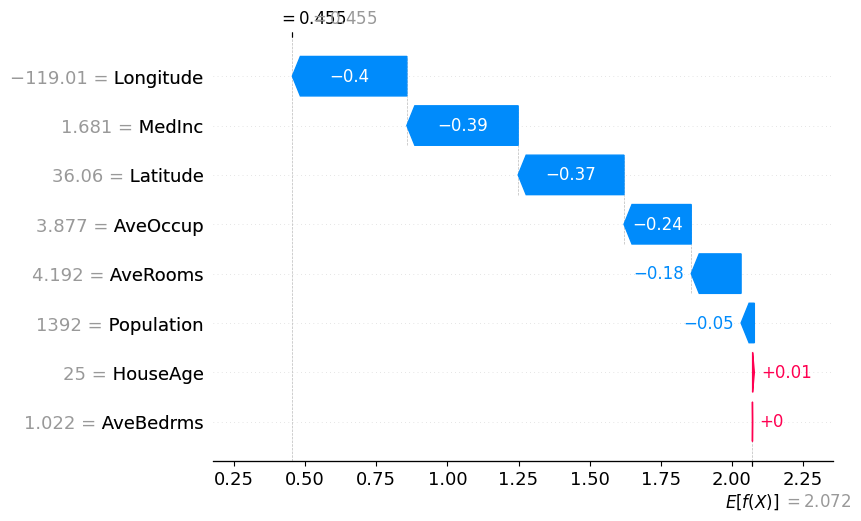

In [70]:
shap.plots.waterfall(shap_values[0])

In [72]:
shap.initjs()
shap.plots.force(shap_values[0])

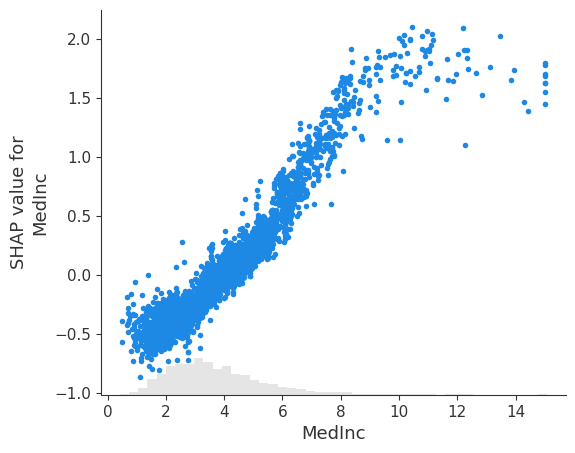

In [76]:
shap.plots.scatter(shap_values[:,'MedInc'])

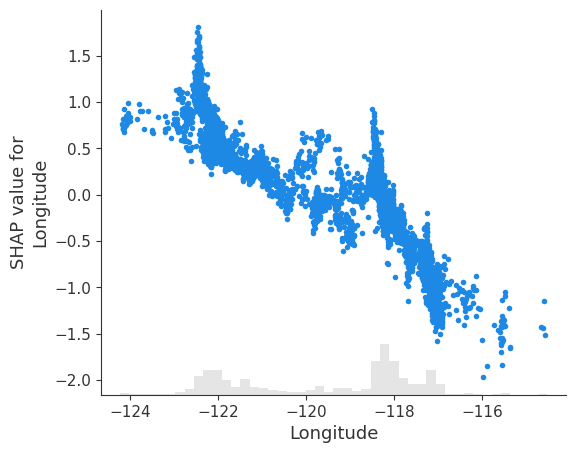

In [77]:
shap.plots.scatter(shap_values[:,'Longitude'])

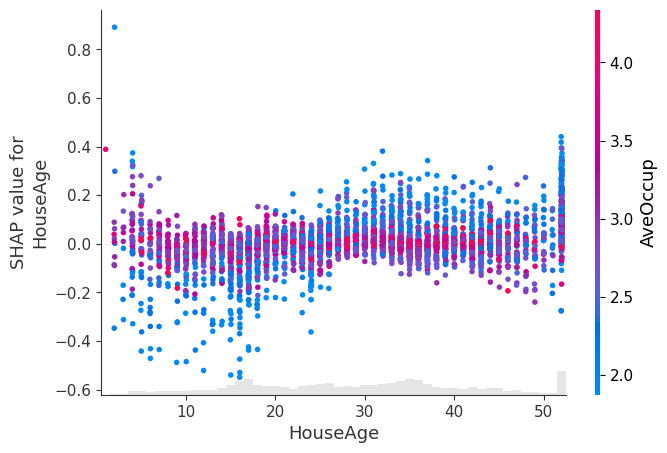

In [78]:
shap.plots.scatter(shap_values[:,'HouseAge'], color=shap_values)